## Stock Market prediction 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [12]:
dataset=pd.read_csv('dataset_test.csv')
dataset

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
0,CNDT,0,NASDAQ,2021,12,10,15,30,792397,5.41,...,0.2,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN
1,CNDT,1,NASDAQ,2021,12,9,15,30,1134639,5.46,...,0.2,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN
2,CNDT,2,NASDAQ,2021,12,8,15,30,939646,5.47,...,0.2,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN
3,CNDT,3,NASDAQ,2021,12,7,15,30,1301257,5.51,...,0.2,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN
4,CNDT,4,NASDAQ,2021,12,6,15,30,1090706,5365.00,...,0.2,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98187,GRTS,247,NASDAQ,2020,12,17,15,30,254495,3.13,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.0000,NaN
98188,GRTS,248,NASDAQ,2020,12,16,15,30,224254,3.13,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.0000,NaN
98189,GRTS,249,NASDAQ,2020,12,15,15,30,197952,3.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98190,GRTS,250,NASDAQ,2020,12,14,15,30,261543,3.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataset.head()

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
0,CNDT,0,NASDAQ,2021,12,10,15,30,792397,5.41,...,0.2,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN
1,CNDT,1,NASDAQ,2021,12,9,15,30,1134639,5.46,...,0.2,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN
2,CNDT,2,NASDAQ,2021,12,8,15,30,939646,5.47,...,0.2,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN
3,CNDT,3,NASDAQ,2021,12,7,15,30,1301257,5.51,...,0.2,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN
4,CNDT,4,NASDAQ,2021,12,6,15,30,1090706,5365.00,...,0.2,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN


In [ ]:
dataset['company']=pd.to_datatime(dataset.company)


In [22]:
dataset.shape

(98192, 77)

In [23]:
dataset.isnull().sum()

company                            0
age                                0
market                             0
year                               0
month                              0
                               ...  
MACD_50_VOLUME                 19500
DAYS_UNTIL_END_OF_MONTH         1170
DAYS_UNTIL_END_OF_TRIMESTER     1170
DINAMIC3                        1170
TARGET                         15990
Length: 77, dtype: int64

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98192 entries, 0 to 98191
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      98192 non-null  object 
 1   age                          98192 non-null  int64  
 2   market                       98192 non-null  object 
 3   year                         98192 non-null  int64  
 4   month                        98192 non-null  int64  
 5   day                          98192 non-null  int64  
 6   hour                         98192 non-null  int64  
 7   minute                       98192 non-null  int64  
 8   volume                       98192 non-null  int64  
 9   high                         98192 non-null  float64
 10  low                          98192 non-null  float64
 11  close                        98192 non-null  float64
 12  open                         98192 non-null  float64
 13  AVERAGE_SMA_3_CL

In [25]:
dataset.isna().any()

company                        False
age                            False
market                         False
year                           False
month                          False
                               ...  
MACD_50_VOLUME                  True
DAYS_UNTIL_END_OF_MONTH         True
DAYS_UNTIL_END_OF_TRIMESTER     True
DINAMIC3                        True
TARGET                          True
Length: 77, dtype: bool

In [26]:
dataset.describe()

,age,year,month,day,hour,minute,volume,high,low,close,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
count,98192.000000,98192.000000,98192.000000,98192.000000,98192.000000,98192.0,9.819200e+04,9.819200e+04,9.819200e+04,98192.000000,...,78692.000000,7.869200e+04,7.869200e+04,7.869200e+04,7.869200e+04,7.869200e+04,97022.0,97022.0,97022.000000,82202.000000
mean,125.426511,2020.944537,6.585710,15.646886,14.940525,30.0,1.253721e+06,3.629737e+03,3.248932e+03,243.539935,...,1.536986,1.536381e+06,1.916548e+04,1.227726e+06,-1.424871e+06,2.100079e+06,18.0,18.0,75.072267,0.056665
std,72.733097,0.228882,3.423395,8.728922,0.236513,0.0,6.292186e+06,4.186605e+04,3.582267e+04,3186.373805,...,3.574251,3.574079e+06,4.498380e+05,3.219572e+06,1.240939e+09,1.231001e+09,0.0,0.0,575.470165,0.231203
min,0.000000,2020.000000,1.000000,1.000000,14.000000,30.0,0.000000e+00,3.648000e-01,3.129000e-01,0.312900,...,0.000000,1.000000e+04,-9.260000e+06,7.211000e+02,-2.147447e+09,-2.147473e+09,18.0,18.0,0.000000,0.000000
25%,62.000000,2021.000000,4.000000,8.000000,15.000000,30.0,5.377325e+04,7.330000e+00,6.860000e+00,6.640000,...,0.300000,2.900000e+05,-4.000000e+04,7.248385e+04,-1.081544e+09,-1.050150e+09,18.0,18.0,0.568425,0.000000
50%,125.000000,2021.000000,7.000000,16.000000,15.000000,30.0,2.227805e+05,1.964000e+01,1.865000e+01,17.520000,...,0.700000,6.700000e+05,1.000000e+04,2.903338e+05,-7.320208e+06,3.106888e+06,18.0,18.0,0.957200,0.000000
75%,188.000000,2021.000000,10.000000,23.000000,15.000000,30.0,7.806512e+05,5.140000e+01,4.834257e+01,42.510000,...,1.500000,1.500000e+06,7.000000e+04,9.326882e+05,1.073657e+09,1.056888e+09,18.0,18.0,1.109375,0.000000
max,251.000000,2021.000000,12.000000,31.000000,15.000000,30.0,7.397306e+08,2.925075e+06,2.944895e+06,332989.000000,...,56.700000,5.668000e+07,9.800000e+06,5.207516e+07,2.147337e+09,2.147451e+09,18.0,18.0,70604.000000,1.000000


In [28]:
print(len(dataset))

98192


<AxesSubplot:>

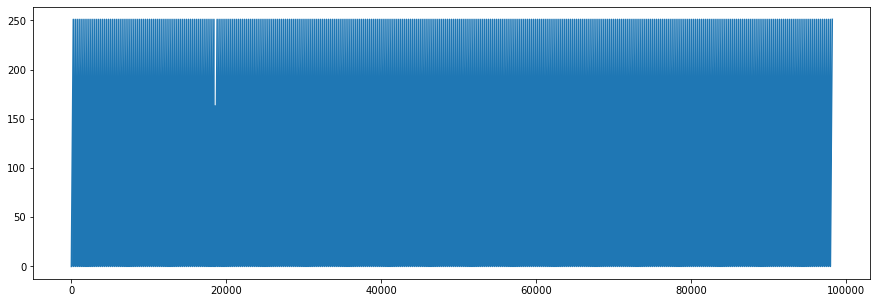

In [32]:
dataset['age'].plot(figsize=(15,5))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'minute'}>,
        <AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>],
       [<AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'AVERAGE_SMA_3_CLOSE'}>,
        <AxesSubplot:title={'center':'EMA_3_CLOSE'}>,
        <AxesSubplot:title={'center':'MACD_3_CLOSE'}>,
        <AxesSubplot:title={'center':'AVERAGE_SMA_3_OPENHIGH'}>,
        <AxesSubplot:title={'center':'EMA_3_OPENHIGH'}>,
        <AxesSubplot:title={'center':'MACD_3_OPENHIGH'}>,
        <AxesSubplot:title={'center':'AVERAGE_SMA_3_HIGHLOW'}>],
       [<AxesSubplot:title={'center':'EMA_3_HIGHLOW'}>,
       

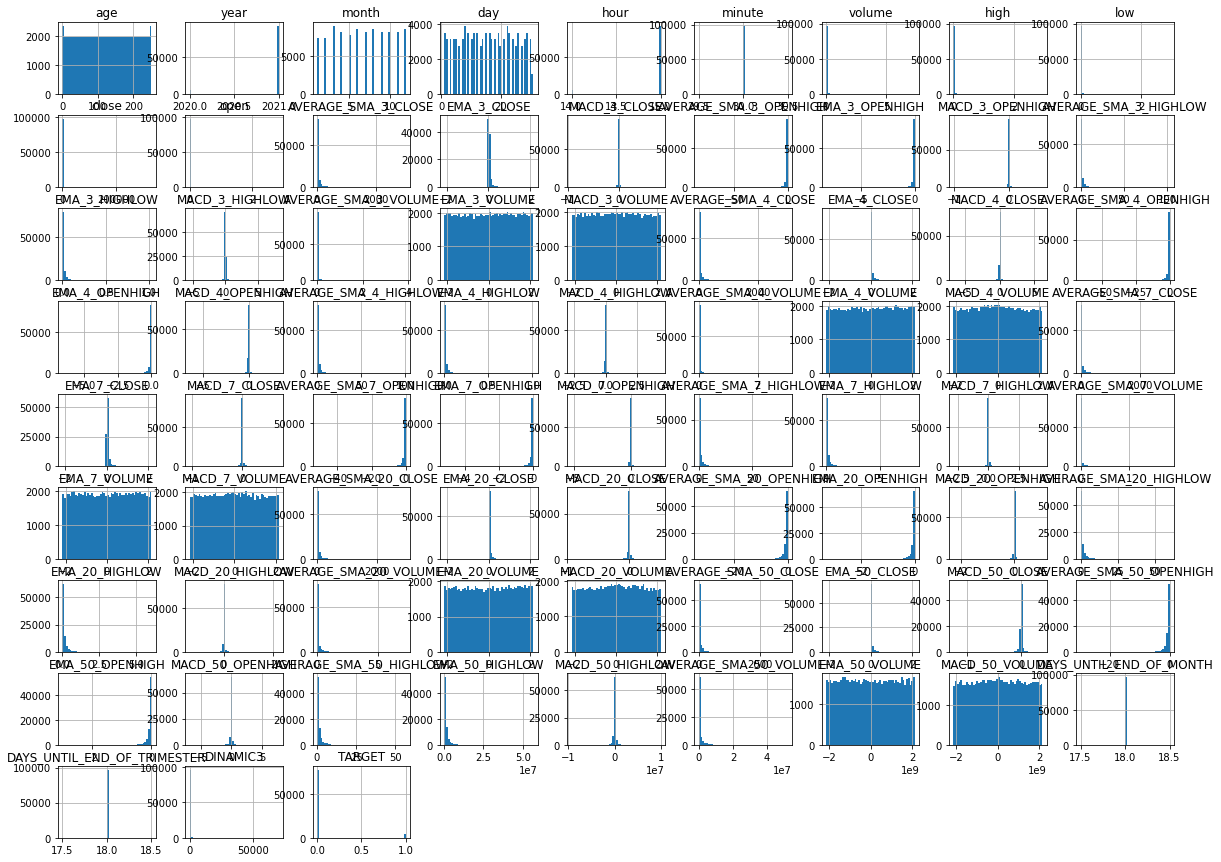

In [43]:
 dataset.hist(bins=50,figsize=(20,15))

## Train-Test-spliting


In [52]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data) * test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [53]:
train_set,test_set=split_train_test(dataset,0.2)

In [54]:
##print(f"ROws in train set: {len(train_set)}\n Rows in test set:{len(test_set)}")

ROws in train set: 78554
 Rows in test set:19638


In [57]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 78553
Rows in test set: 19639


In [61]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(dataset,dataset['company']):
    strat_train_set=dataset.loc[ train_index]
    strat_test_set=dataset.loc[ test_index]

In [62]:
strat_test_set['company'].value_counts()

CVLY    51
CPSI    51
FFIV    51
GGAL    51
CSIQ    51
        ..
DADA    50
FIBK    50
ESPR    50
FORM    50
CURI    33
Name: company, Length: 390, dtype: int64

In [63]:
strat_train_set['company'].value_counts()

FNCB     202
GNFT     202
CRWS     202
ECOL     202
FWONA    202
        ... 
EXPD     201
FDUS     201
EWBC     201
FVE      201
CURI     131
Name: company, Length: 390, dtype: int64

In [64]:
95/7

13.571428571428571

In [65]:
376/28

13.428571428571429

## Loking for correlations

In [66]:
corr_matrix = dataset.corr()

In [1]:
corr_matrix['age'].sort_values(ascending=False)

NameError: name 'corr_matrix' is not defined

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 30.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 30.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 30.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='TARGET', ylabel='year'>,
        <AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='minute', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='TARGET'>,
        <AxesSubplot:xlabel='TARGET', ylabel='TARGET'>,
        <AxesSubplot:xlabel='month', ylabel='TARGET'>,
        <AxesSubplot:xlabel='minute', ylabel='TARGET'>],
       [<AxesSubplot:xlabel='year', ylabel='month'>,
        <AxesSubplot:xlabel='TARGET', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='minute', ylabel='month'>],
       [<AxesSubplot:xlabel='year', ylabel='minute'>,
        <AxesSubplot:xlabel='TARGET', ylabel='minute'>,
        <AxesSubplot:xlabel='month', ylabel='minute'>,
        <AxesSubplot:xlabel='minute', ylabel='minute'>]], dtype=object)

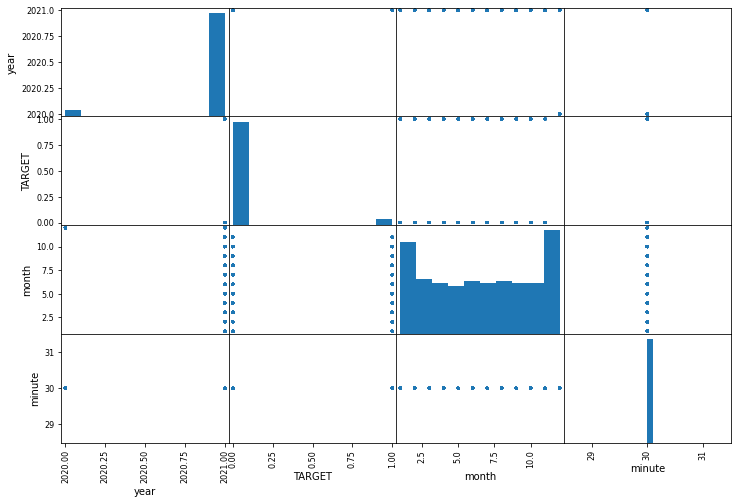

In [68]:
from pandas.plotting import scatter_matrix
attributes = ["year","TARGET","month","minute"]
scatter_matrix(dataset[attributes],figsize = (12,8))

<AxesSubplot:xlabel='MACD_50_HIGHLOW', ylabel='AVERAGE_SMA_50_VOLUME'>

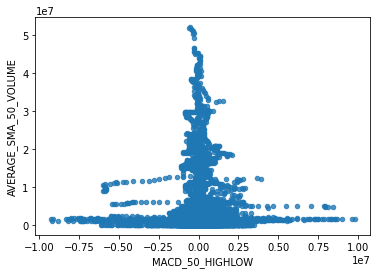

In [73]:
dataset.plot(kind="scatter",x = "MACD_50_HIGHLOW",y="AVERAGE_SMA_50_VOLUME",alpha=0.8)